In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from model.model import predict

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Normalizing pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# تحويل التسميات إلى تنسيق One-Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# بناء النموذج
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(
    monitor='val_loss',  # يمكن تغييره إلى 'val_accuracy' إذا كنت ترغب في مراقبة الدقة
    patience=3,  # عدد epochs التي يتم الانتظار فيها بعد عدم التحسن
    restore_best_weights=True  # استعادة أفضل أوزان للنموذج
)


model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=[
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  tf.keras.metrics.AUC(name='auc')
              ])

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=100,  # عدد epochs يمكن أن يكون أكبر من عدد epochs الفعلي بفضل EarlyStopping
    validation_split=0.3,
    callbacks=[early_stopping]
)

In [ ]:
# رسم منحنى التعلم
plt.figure(figsize=(12, 6))

# رسم خسارة التدريب
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# # رسم دقة التدريب
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

plt.show()

In [ ]:
test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

In [ ]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)
y_pred_classes, y_true_classes

In [ ]:
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
f1

In [ ]:
print(classification_report(y_true_classes, y_pred_classes))

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix(y_true_classes, y_pred_classes))

In [ ]:
# رسم مصفوفة الالتباس باستخدام seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('fashion_mnist.keras')

In [26]:
m2 = tf.keras.models.load_model(r'D:\projects\AI Track\My Final Models\Virsion 2\FashionImageRecognizer\model\saved_model\fashion_mnist_2.keras')
m1 = tf.keras.models.load_model(r'D:\projects\AI Track\My Final Models\Virsion 2\FashionImageRecognizer\model\saved_model\fashion_mnist_1.keras')


ValueError: File not found: filepath=D:\projects\AI Track\My Final Models\Virsion 2\FashionImageRecognizer\model\saved_model\fashion_mnist_2.keras. Please ensure the file is an accessible `.keras` zip file.

In [15]:
y_pred = m1.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
f1

0.865403428973927

In [17]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.73      0.82      0.77      1000
           3       0.82      0.89      0.86      1000
           4       0.74      0.82      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.76      0.57      0.65      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix(y_true_classes, y_pred_classes))

[[783   3  39  70   8   1  90   0   6   0]
 [  0 971   2  22   3   0   1   0   1   0]
 [  7   0 824  12 117   0  38   0   2   0]
 [ 12  16  19 894  35   0  21   0   3   0]
 [  1   0 113  41 816   0  28   0   1   0]
 [  0   0   0   0   0 946   0  27   2  25]
 [125   2 124  46 122   0 567   0  14   0]
 [  0   0   0   0   0  20   0 944   0  36]
 [  4   0  13   4   7   4   1   5 962   0]
 [  0   0   0   0   0   6   1  29   0 964]]


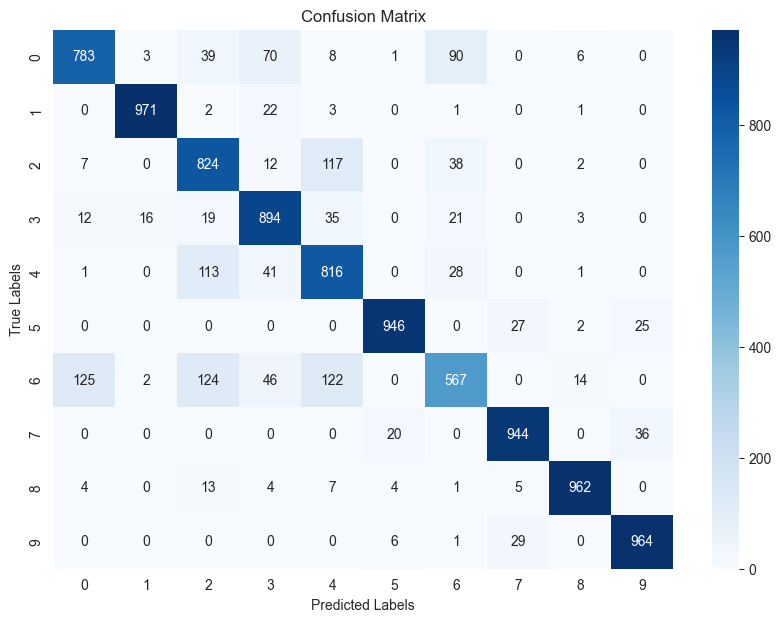

In [19]:
# رسم مصفوفة الالتباس باستخدام seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
y_pred = m2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
f1

0.8802574786668682

In [22]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.79      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.69      0.67      0.68      1000
           7       0.92      0.97      0.94      1000
           8       0.99      0.96      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [23]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix(y_true_classes, y_pred_classes))

[[838   1  22  22   6   1 107   0   3   0]
 [  1 970   2  19   3   0   5   0   0   0]
 [ 16   0 811  12  92   0  69   0   0   0]
 [ 25   8  14 887  29   1  33   0   3   0]
 [  4   0 100  30 792   0  73   0   1   0]
 [  0   0   0   1   0 966   0  25   1   7]
 [139   0  90  28  64   0 673   0   6   0]
 [  0   0   0   0   0  13   0 974   0  13]
 [  9   0   3   3   4   4   9   6 962   0]
 [  0   0   0   0   0  12   2  58   0 928]]


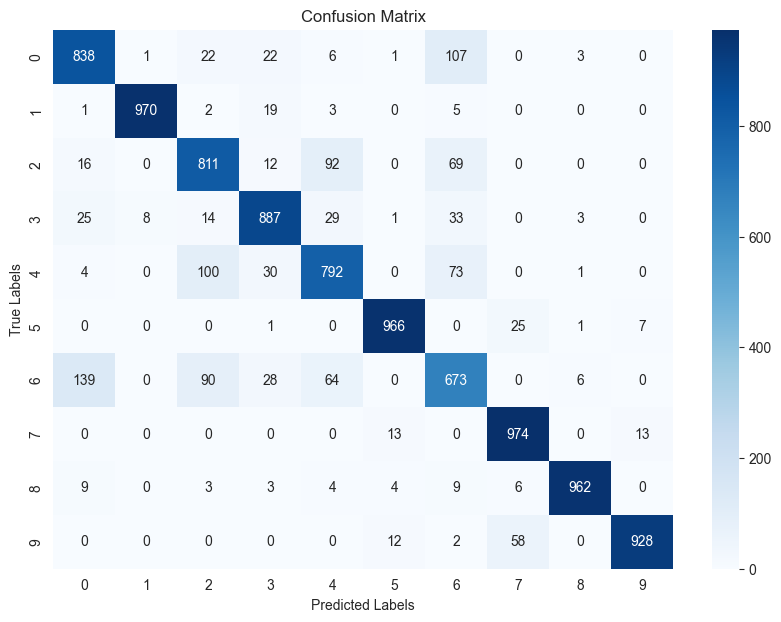

In [24]:
# رسم مصفوفة الالتباس باستخدام seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()